In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#  Import and read the matches4.csv.
match_df = pd.read_csv("Project4/matches4.csv")
match_df.head()

2023-06-01 18:05:07.637924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City


In [2]:
matches = match_df.copy()
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City


In [3]:
# Convert date to datetime
matches["date"] = pd.to_datetime(matches["date"])

In [4]:
# Convert venue 
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City,0
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City,1
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City,0
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City,1
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City,1


In [5]:
# Convert away teams
matches["away_team"] = matches["opponent"].astype("category").cat.codes

In [6]:
# Create hours from time
matches["hour"] = matches["time"].str.replace(":.+", "", regex = True).astype("int")

In [7]:
# Create day column from date
matches["day"] = matches["date"].dt.dayofweek

In [8]:
# Create code from result
matches["win_loss"] = (matches["result"] =="W").astype("int")
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,dist,fk,pk,pkatt,season,team,venue_code,away_team,hour,win_loss
0,1,2022-08-07,16:30,Premier League,Matchweek 1,6,Away,W,2.0,0.0,...,18.7,1.0,1.0,1.0,2022,Manchester City,0,25,16,1
1,2,2022-08-13,15:00,Premier League,Matchweek 2,5,Home,W,4.0,0.0,...,17.5,0.0,0.0,0.0,2022,Manchester City,1,2,15,1
2,3,2022-08-21,16:30,Premier League,Matchweek 3,6,Away,D,3.0,3.0,...,16.2,1.0,0.0,0.0,2022,Manchester City,0,17,16,0
3,4,2022-08-27,15:00,Premier League,Matchweek 4,5,Home,W,4.0,2.0,...,14.1,0.0,0.0,0.0,2022,Manchester City,1,8,15,1
4,5,2022-08-31,19:30,Premier League,Matchweek 5,2,Home,W,6.0,0.0,...,14.8,0.0,0.0,0.0,2022,Manchester City,1,19,19,1


In [9]:
matches.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'venue_code', 'away_team',
       'hour', 'win_loss'],
      dtype='object')

In [10]:
matches.drop(["Unnamed: 0", "date", "time", "comp", "round", "venue", "result", "poss", "attendance", "captain", "formation", "referee", "match report", "notes", "opponent", "dist", "season"], axis=1, inplace=True)
matches.head()

,day,gf,ga,xg,xga,sh,sot,fk,pk,pkatt,team,venue_code,away_team,hour,win_loss
0,6,2.0,0.0,2.2,0.5,13.0,1.0,1.0,1.0,1.0,Manchester City,0,25,16,1
1,5,4.0,0.0,1.7,0.1,19.0,7.0,0.0,0.0,0.0,Manchester City,1,2,15,1
2,6,3.0,3.0,2.1,1.8,21.0,10.0,1.0,0.0,0.0,Manchester City,0,17,16,0
3,5,4.0,2.0,2.2,0.1,18.0,5.0,0.0,0.0,0.0,Manchester City,1,8,15,1
4,2,6.0,0.0,3.3,0.7,17.0,9.0,0.0,0.0,0.0,Manchester City,1,19,19,1


In [11]:
y = matches['win_loss']
X = matches.copy()
X.drop("win_loss", axis=1, inplace=True)
X.head()

,day,gf,ga,xg,xga,sh,sot,fk,pk,pkatt,team,venue_code,away_team,hour
0,6,2.0,0.0,2.2,0.5,13.0,1.0,1.0,1.0,1.0,Manchester City,0,25,16
1,5,4.0,0.0,1.7,0.1,19.0,7.0,0.0,0.0,0.0,Manchester City,1,2,15
2,6,3.0,3.0,2.1,1.8,21.0,10.0,1.0,0.0,0.0,Manchester City,0,17,16
3,5,4.0,2.0,2.2,0.1,18.0,5.0,0.0,0.0,0.0,Manchester City,1,8,15
4,2,6.0,0.0,3.3,0.7,17.0,9.0,0.0,0.0,0.0,Manchester City,1,19,19


In [12]:
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: win_loss, dtype: int64

In [13]:
X = pd.get_dummies(X)
X

,day,gf,ga,xg,xga,sh,sot,fk,pk,pkatt,...,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,6,2.0,0.0,2.2,0.5,13.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,5,4.0,0.0,1.7,0.1,19.0,7.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6,3.0,3.0,2.1,1.8,21.0,10.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5,4.0,2.0,2.2,0.1,18.0,5.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2,6.0,0.0,3.3,0.7,17.0,9.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,5,0.0,4.0,0.8,2.5,7.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3796,5,1.0,2.0,1.0,0.9,13.0,3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3797,4,0.0,5.0,0.2,3.1,5.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3798,6,1.0,1.0,1.0,1.8,7.0,3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [15]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Decrease hidden nodes on each layer

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 2

nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 388
Trainable params: 388


2023-06-01 18:05:27.596991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
90/90 [==============================] - 1s 2ms/step - loss: 0.7718 - accuracy: 0.3891
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.3891
Epoch 3/50
90/90 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.4491
Epoch 4/50
90/90 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.7916
Epoch 5/50
90/90 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.8253
Epoch 6/50
90/90 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.8354
Epoch 7/50
90/90 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.8547
Epoch 8/50
90/90 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.8793
Epoch 9/50
90/90 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.9165
Epoch 10/50
90/90 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.9449
Epoch 11/50
90/90 [

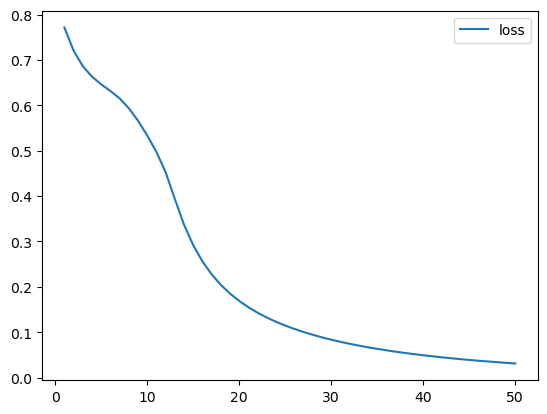

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

30/30 - 0s - loss: 0.0304 - accuracy: 1.0000 - 204ms/epoch - 7ms/step
Loss: 0.030396923422813416, Accuracy: 1.0


In [21]:
X.to_csv('nn_epl_features.csv', index=False)